<a href="https://colab.research.google.com/github/BenjaminHosseini/MNIST_SVM/blob/main/MNIST_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# load the MNIST dataset
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)
# Normalizing the pixel values
X = mnist.data / 255.0
# Converting label to integer
y = mnist.target.astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# print num_samples, num_features
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


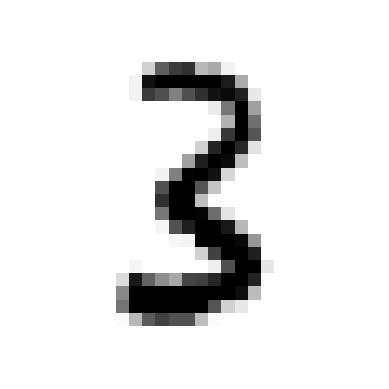

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# choose a random digit from dataset
some_digit = X[50000]

# reshape it to 28 * 28
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

#Linear SVM model

In [ ]:
# Linear sVM pipline
linear_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SVM', OneVsRestClassifier(LinearSVC(max_iter=5000, C=10, random_state=42)))
])

In [ ]:
# Train and pridict with Linear SVM
linear_svm_pipeline.fit(X_train, y_train)
y_pred_linear = linear_svm_pipeline.predict(X_test)

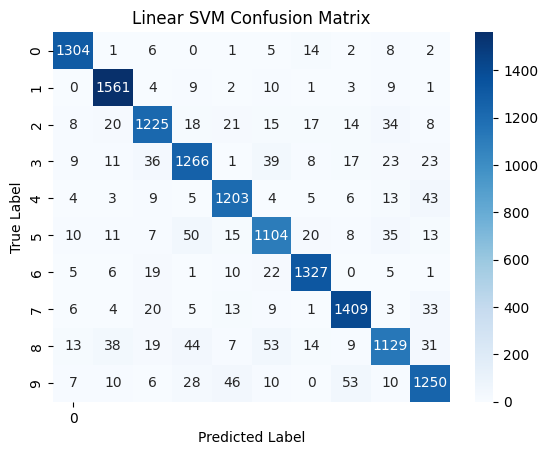

In [ ]:
# Confusion metrix for linear SVM
linear_confusion_matrix = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(linear_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=(10), yticklabels=range(10))
plt.title("Linear SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluating the model
# Accuracy and classification report for Linear SVM
print('Linear SVM Result')
print('Accuracy: ', accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear SVM Result
Accuracy:  0.9127142857142857
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.98      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.88      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.87      0.87      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.83      0.86      1357
           9       0.89      0.88      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



#Kernel (RBF) SVM

In [ ]:
# RBF SVM pipeline
rbf_svm_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalize data
        ('kernel_svm', OneVsRestClassifier(SVC(kernel='rbf', C=10 , gamma='scale', random_state=42)))
    ])

In [ ]:
# Train and predict with RBF SVM
rbf_svm_pipeline.fit(X_train, y_train)
y_pred_rbf = rbf_svm_pipeline.predict(X_test)

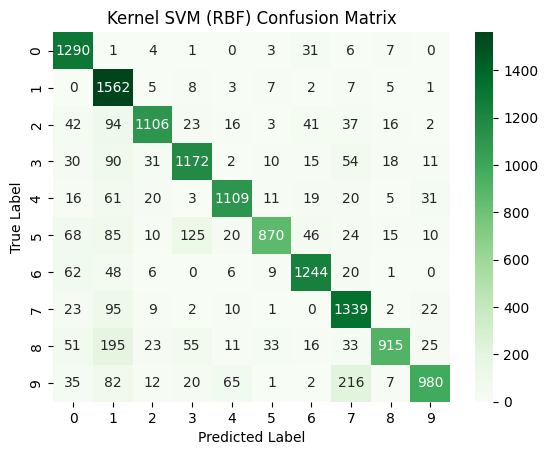

In [ ]:
# Confusion matrix for kernel SVM (RBF)
kernel_conf_matrix = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(kernel_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title("Kernel SVM (RBF) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluating the model
# Accuracy and classification report for RBF SVM
print('RBF SVM Results:')
print('Accuracy: ', accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

RBF SVM Results:
Accuracy:  0.8276428571428571
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1343
           1       0.68      0.98      0.80      1600
           2       0.90      0.80      0.85      1380
           3       0.83      0.82      0.82      1433
           4       0.89      0.86      0.87      1295
           5       0.92      0.68      0.78      1273
           6       0.88      0.89      0.88      1396
           7       0.76      0.89      0.82      1503
           8       0.92      0.67      0.78      1357
           9       0.91      0.69      0.78      1420

    accuracy                           0.83     14000
   macro avg       0.85      0.82      0.83     14000
weighted avg       0.84      0.83      0.83     14000

